# A basic intro to GANs (Generative Adversarial Networks)

### What is a Generative Adversarial Network?

Generative Adversarial Networks (GANs) are a powerful class of neural networks that are used for an unsupervised learning. GANs are made up of two neural networks, a discriminator and a generator. They use adversarial training to produce artificial data that is identical to actual data. 

- The Generator attempts to fool the Discriminator, which is tasked with accurately distinguishing between produced and genuine data, by producing random noise samples.
- Realistic, high-quality samples are produced as a result of this competitive interaction, which drives both networks toward advancement.
- GANs are proving to be highly versatile artificial intelligence tools, as evidenced by their extensive use in image synthesis, style transfer, and text-to-image synthesis.
- They have also revolutionized generative modeling.


An example of GANs’ results from 2018 is below, these images are fake yet very realistic. The generation of these fictional celebrity portraits, from the database of real portraits Celeba-HQ composed of 30,000 images, took 19 days. The generated images have a size of 1024×1024.

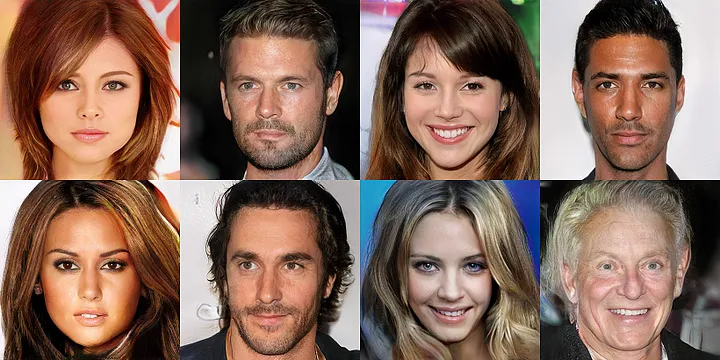

    Figure 1: Realistic yet fictional portraits of celebrities generated from originals using GANs. Source: Nvidia [4].

###  How do GANs work?

Generative adversarial networks (GANs) are a generative model with implicit density estimation, part of unsupervised learning and are using two neural networks. Thus, we understand the terms “generative” and “networks” in “generative adversarial networks”.

### The principle: generator vs discriminator

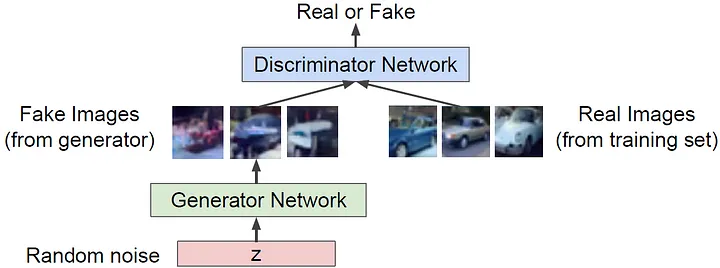

    Figure 2: Roles of the generator and the discriminator. Source: Stanford CS231n [2].

 The principle is a two-player game: a neural network called the generator and a neural network called the discriminator. The generator tries to fool the discriminator by generating real-looking images while the discriminator tries to distinguish between real and fake images. Hence, we understand the term “adversarial” in “generative adversarial networks”.

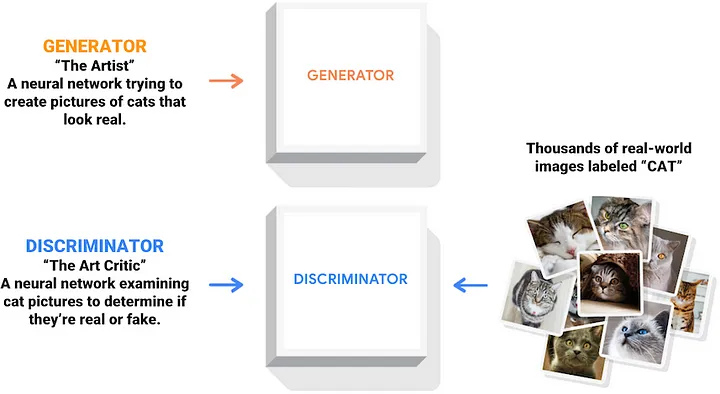

    Figure 3: Interpretation: roles of the generator and the discriminator. Source: TensorFlow.

At the bottom left of Figure 2, we can see that our generator samples from a simple distribution: random noise. The generator can be interpreted as an artist and the discriminator as an art critic. See Figure 3.

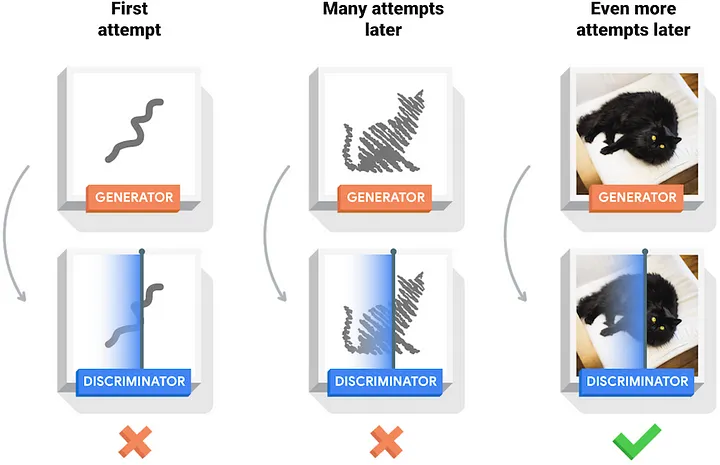

    Figure 4: Generator and discriminator training. Source: TensorFlow.

During training, the generator progressively becomes better at creating images that look real, while the discriminator becomes better at telling them apart. The process reaches equilibrium when the discriminator can no longer distinguish real from fake images. See Figure 4. Thus, if the discriminator is well trained and the generator manages to generate real-looking images that fool the discriminator, then we have a good generative model: we are generating images that look like the training set.

After this training phase, we only need the generator to sample new (false) realistic data. We no longer need the discriminator. Note that the random noise guarantees that the generator does not always produce the same image (which can deceive the discriminator).

Note that at the beginning of the training in Figure 4, the generator only generates a random noise that does not look like the training data.

## Types of GANs

1. `Vanilla GAN`: This is the simplest type of GAN. Here, the Generator and the Discriminator are simple a basic multi-layer perceptrons. In vanilla GAN, the algorithm is really simple, it tries to optimize the mathematical equation using stochastic gradient descent.

2. `Conditional GAN (CGAN)`: CGAN can be described as a deep learning method in which some conditional parameters are put into place.
- In CGAN, an additional parameter ‘y’ is added to the Generator for generating the corresponding data.
- Labels are also put into the input to the Discriminator in order for the Discriminator to help distinguish the real data from the fake generated data.

3. `Deep Convolutional GAN (DCGAN)`: DCGAN is one of the most popular and also the most successful implementations of GAN. It is composed of ConvNets in place of multi-layer perceptrons.
- The ConvNets are implemented without max pooling, which is in fact replaced by convolutional stride.
- Also, the layers are not fully connected.

4. `Laplacian Pyramid GAN (LAPGAN)`: The Laplacian pyramid is a linear invertible image representation consisting of a set of band-pass images, spaced an octave apart, plus a low-frequency residual.

- This approach uses multiple numbers of Generator and Discriminator networks and different levels of the Laplacian Pyramid.
- This approach is mainly used because it produces very high-quality images. The image is down-sampled at first at each layer of the pyramid and then it is again up-scaled at each layer in a backward pass where the image acquires some noise from the Conditional GAN at these layers until it reaches its original size.

5. `Super Resolution GAN (SRGAN)`: SRGAN as the name suggests is a way of designing a GAN in which a deep neural network is used along with an adversarial network in order to produce higher-resolution images. This type of GAN is particularly useful in optimally up-scaling native low-resolution images to enhance their details minimizing errors while doing so.

## Implementation of Generative Adversarial Network (GAN)

In [2]:
# Libraries

import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import numpy as np

In [4]:
# Set device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cpu')

For training on the CIFAR-10 image dataset, this PyTorch module creates a Generative Adversarial Network (GAN), switching between generator and discriminator training. Visualization of the generated images occurs every tenth epoch, and the development of the GAN is tracked.

In [5]:
# Define a basic transform

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])


In [8]:
# Loading CIFAR-10 dataset 

import torch.utils
import torch.utils.data
import torch.utils.data.dataloader


train_ds = datasets.CIFAR10(root='./data', \
                            train=True, download=True, transform=transform)

dataloader = torch.utils.data.DataLoader(train_ds, \
                                batch_size=32, shuffle=True)

Files already downloaded and verified


### Defining parameters to be used in later processes

A Generative Adversarial Network (GAN) is used with specified hyperparameters.

    The latent space’s dimensionality is represented by latent_dim.
    lr is the optimizer’s learning rate.
    The coefficients for the Adam optimizer are beta1 and beta2. To find the total number of training epochs, use num_epochs.

In [15]:
# Hyperparameters
latent_dim = 100
lr = 0.0002
beta1 = 0.5
beta2 = 0.999
num_epochs = 3

### Defining a Utility Class to Build the Generator

The generator architecture for a GAN in PyTorch is defined with below code.

    From nn.Module, the Generator class inherits. It is comprised of a sequential model with Tanh, linear, convolutional, batch normalization, reshaping, and upsampling layers.
    The neural network synthesizes an image (img) from a latent vector (z), which is the generator’s output. 

The architecture uses a series of learned transformations to turn the initial random noise in the latent space into a meaningful image.

In [16]:
# Define the generator

class Generator(nn.Module):
    def __init__(self, latent_dim):
        super(Generator, self).__init__()


        self.model = nn.Sequential(
            nn.Linear(latent_dim, 128 *8 *8),
            nn.ReLU(),
            nn.Unflatten(1, (128,8,8)),
            nn.Upsample(scale_factor=2),
            nn.Conv2d(128, 128, kernel_size=3, padding=1),
            nn.BatchNorm2d(128, momentum=0.78),
            nn.ReLU(),
            nn.Upsample(scale_factor=2),
            nn.Conv2d(128, 64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64, momentum=0.78),
            nn.ReLU(),
            nn.Conv2d(64, 3, kernel_size=3, padding=1),
            nn.Tanh()
        )

    def forward(self, z):
        img = self.model(z)
        return img

### Defining a Utility Class to Build the Discriminator

The PyTorch code describes the discriminator architecture for a GAN. The class Discriminator is descended from nn.Module. It is composed of linear layers, batch normalization, dropout, convolutional, LeakyReLU, and sequential layers.

An image (img) is the discriminator’s input, and its validity—the probability that the input image is real as opposed to artificial—is its output. 

In [17]:
# Define the discriminator

class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()

        self.model = nn.Sequential(
        nn.Conv2d(3, 32, kernel_size=3, stride=2, padding=1),
        nn.LeakyReLU(0.2),
        nn.Dropout(0.25),
        nn.Conv2d(32, 64, kernel_size=3, stride=2, padding=1),
        nn.ZeroPad2d((0, 1, 0, 1)),
        nn.BatchNorm2d(64, momentum=0.82),
        nn.LeakyReLU(0.25),
        nn.Dropout(0.25),
        nn.Conv2d(64, 128, kernel_size=3, stride=2, padding=1),
        nn.BatchNorm2d(128, momentum=0.82),
        nn.LeakyReLU(0.2),
        nn.Dropout(0.25),
        nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1),
        nn.BatchNorm2d(256, momentum=0.8),
        nn.LeakyReLU(0.25),
        nn.Dropout(0.25),
        nn.Flatten(),
        nn.Linear(256 * 5 * 5, 1),
        nn.Sigmoid()
    )
        
    def forward(self, img):
        validity = self.model(img)
        return validity

### Building the Generative Adversarial Network

The code snippet defines and initializes a discriminator (Discriminator) and a generator (Generator).

    The designated device (GPU if available) receives both models. Binary Cross Entropy Loss, which is frequently used for GANs, is selected as the loss function (adversarial_loss).
    
    For the generator (optimizer_G) and discriminator (optimizer_D), distinct Adam optimizers with predetermined learning rates and betas are also defined. 

In [18]:

# Define the generator and discriminator
# Initialize generator and discriminator

generator = Generator(latent_dim).to(device)
discriminator = Discriminator().to(device)

# Loss function
adversarial_loss = nn.BCELoss()
# Optimizers
optimizer_G = optim.Adam(generator.parameters()\
                         , lr=lr, betas=(beta1, beta2))
optimizer_D = optim.Adam(discriminator.parameters()\
                         , lr=lr, betas=(beta1, beta2))

Training the Generative Adversarial Network

For a Generative Adversarial Network (GAN), the code implements the training loop.

-     The training data batches are iterated through during each epoch. Whereas the generator (optimizer_G) is trained to generate realistic images that trick the discriminator, the discriminator (optimizer_D) is trained to distinguish between real and phony images.
-     The generator and discriminator’s adversarial losses are computed. Model parameters are updated by means of Adam optimizers and the losses are backpropagated.
-     Discriminator printing and generator losses are used to track progress. For a visual assessment of the training process, generated images are additionally saved and shown every 10 epochs.



In [19]:
# Training loop
for epoch in range(num_epochs):
	for i, batch in enumerate(dataloader):
	# Convert list to tensor
		real_images = batch[0].to(device) 
		# Adversarial ground truths
		valid = torch.ones(real_images.size(0), 1, device=device)
		fake = torch.zeros(real_images.size(0), 1, device=device)
		# Configure input
		real_images = real_images.to(device)

		# ---------------------
		# Train Discriminator
		# ---------------------
		optimizer_D.zero_grad()
		# Sample noise as generator input
		z = torch.randn(real_images.size(0), latent_dim, device=device)
		# Generate a batch of images
		fake_images = generator(z)

		# Measure discriminator's ability 
		# to classify real and fake images
		real_loss = adversarial_loss(discriminator\
									(real_images), valid)
		fake_loss = adversarial_loss(discriminator\
									(fake_images.detach()), fake)
		d_loss = (real_loss + fake_loss) / 2
		# Backward pass and optimize
		d_loss.backward()
		optimizer_D.step()

		# -----------------
		# Train Generator
		# -----------------

		optimizer_G.zero_grad()
		# Generate a batch of images
		gen_images = generator(z)
		# Adversarial loss
		g_loss = adversarial_loss(discriminator(gen_images), valid)
		# Backward pass and optimize
		g_loss.backward()
		optimizer_G.step()
		# ---------------------
		# Progress Monitoring
		# ---------------------
		if (i + 1) % 100 == 0:
			print(
				f"Epoch [{epoch+1}/{num_epochs}]\
						Batch {i+1}/{len(dataloader)} "
				f"Discriminator Loss: {d_loss.item():.4f} "
				f"Generator Loss: {g_loss.item():.4f}"
			)
	# Save generated images for every epoch
	if (epoch + 1) % 10 == 0:
		with torch.no_grad():
			z = torch.randn(16, latent_dim, device=device)
			generated = generator(z).detach().cpu()
			grid = torchvision.utils.make_grid(generated,\
										nrow=4, normalize=True)
			plt.imshow(np.transpose(grid, (1, 2, 0)))
			plt.axis("off")
			plt.show()


Epoch [1/3]						Batch 100/1563 Discriminator Loss: 0.6111 Generator Loss: 1.3897
Epoch [1/3]						Batch 200/1563 Discriminator Loss: 0.5589 Generator Loss: 1.1426
Epoch [1/3]						Batch 300/1563 Discriminator Loss: 0.5887 Generator Loss: 1.3035
Epoch [1/3]						Batch 400/1563 Discriminator Loss: 0.2758 Generator Loss: 1.9189
Epoch [1/3]						Batch 500/1563 Discriminator Loss: 0.6463 Generator Loss: 1.6081
Epoch [1/3]						Batch 600/1563 Discriminator Loss: 0.3463 Generator Loss: 1.6242
Epoch [1/3]						Batch 700/1563 Discriminator Loss: 0.7676 Generator Loss: 0.8862
Epoch [1/3]						Batch 800/1563 Discriminator Loss: 0.5177 Generator Loss: 1.2898
Epoch [1/3]						Batch 900/1563 Discriminator Loss: 0.5491 Generator Loss: 1.4187
Epoch [1/3]						Batch 1000/1563 Discriminator Loss: 0.5811 Generator Loss: 1.3402
Epoch [1/3]						Batch 1100/1563 Discriminator Loss: 0.6598 Generator Loss: 1.0825
Epoch [1/3]						Batch 1200/1563 Discriminator Loss: 0.5216 Generator Loss: 0.8042
Epoch [1/3]		